# Visualization of POVMs

How to get basic visualization single-qubit POVMs (and products of them).

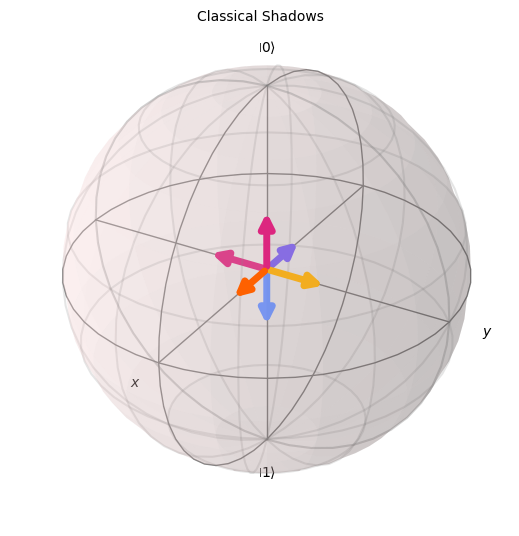

In [1]:
from povm_toolbox.library import ClassicalShadows

cs = ClassicalShadows(1)
sqpovm1 = cs.definition()[(0,)]
sqpovm1.draw_bloch(title="Classical Shadows")

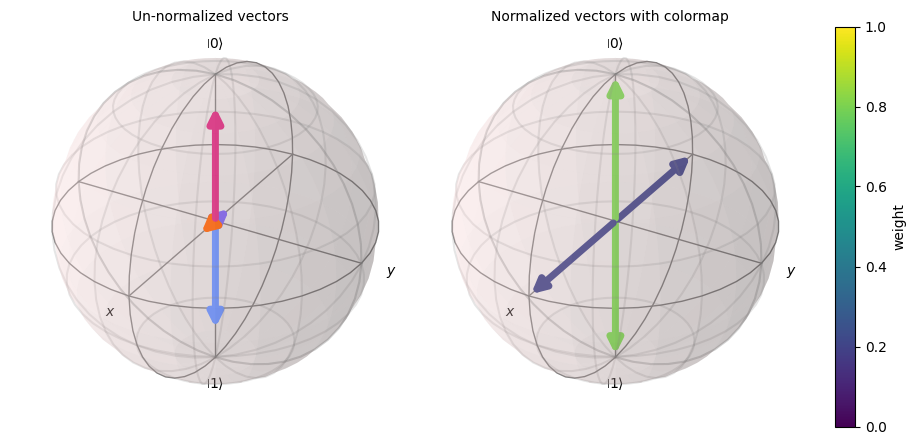

In [2]:
import matplotlib.pyplot as plt
from povm_toolbox.quantum_info import SingleQubitPOVM
from qiskit.quantum_info import Operator

sqpovm2 = SingleQubitPOVM(
    [
        0.8 * Operator.from_label("0"),
        0.8 * Operator.from_label("1"),
        0.2 * Operator.from_label("+"),
        0.2 * Operator.from_label("-"),
    ]
)


fig = plt.figure(figsize=(9, 4))
ax = fig.add_axes([0, 0, 4 / 9, 1], projection="3d")
sqpovm2.draw_bloch(fig=fig, ax=ax, title="Un-normalized vectors")
ax = fig.add_axes([4 / 9, 0, 5 / 9, 1], projection="3d")
sqpovm2.draw_bloch(fig=fig, ax=ax, colorbar=True, title="Normalized vectors with colormap")

plt.show()

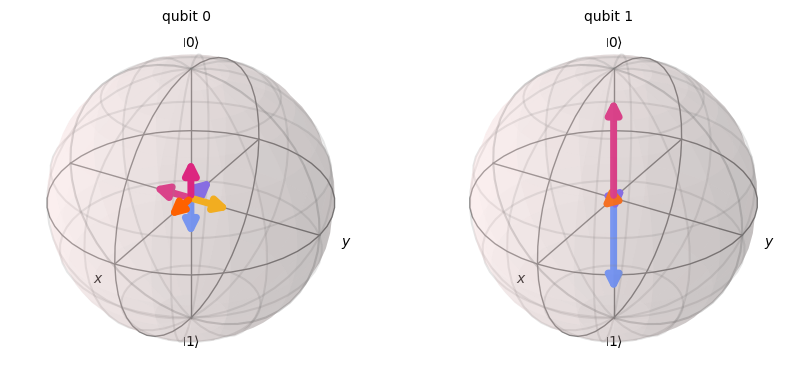

In [3]:
from povm_toolbox.quantum_info import ProductPOVM

prod_povm = ProductPOVM.from_list([sqpovm1, sqpovm2])
prod_povm.draw_bloch()

In [4]:
import cmath

import numpy as np

vecs = np.sqrt(1.0 / 2.0) * np.array(
    [
        [1, 0],
        [np.sqrt(1.0 / 3.0), np.sqrt(2.0 / 3.0)],
        [np.sqrt(1.0 / 3.0), np.sqrt(2.0 / 3.0) * cmath.exp(2.0j * np.pi / 3)],
        [np.sqrt(1.0 / 3.0), np.sqrt(2.0 / 3.0) * cmath.exp(4.0j * np.pi / 3)],
    ]
)

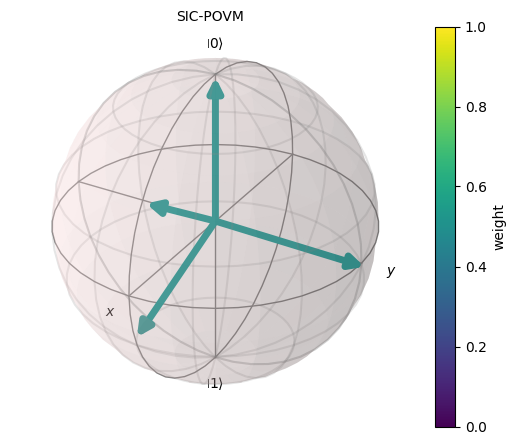

In [5]:
sic_povm = SingleQubitPOVM.from_vectors(vecs)
sic_povm.draw_bloch(title="SIC-POVM", colorbar=True)

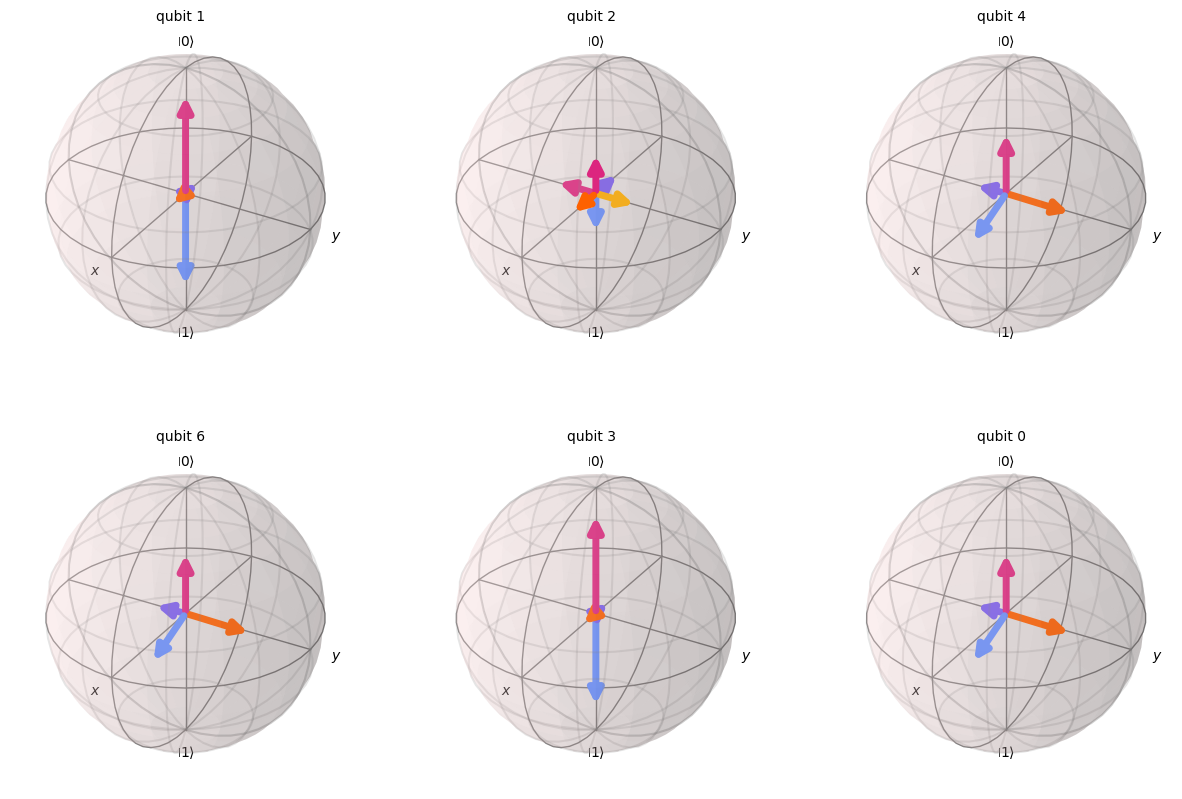

In [6]:
prod_povm = ProductPOVM(
    {(1,): sqpovm2, (2,): sqpovm1, (4,): sic_povm, (6,): sic_povm, (3,): sqpovm2, (0,): sic_povm}
)
prod_povm.draw_bloch()

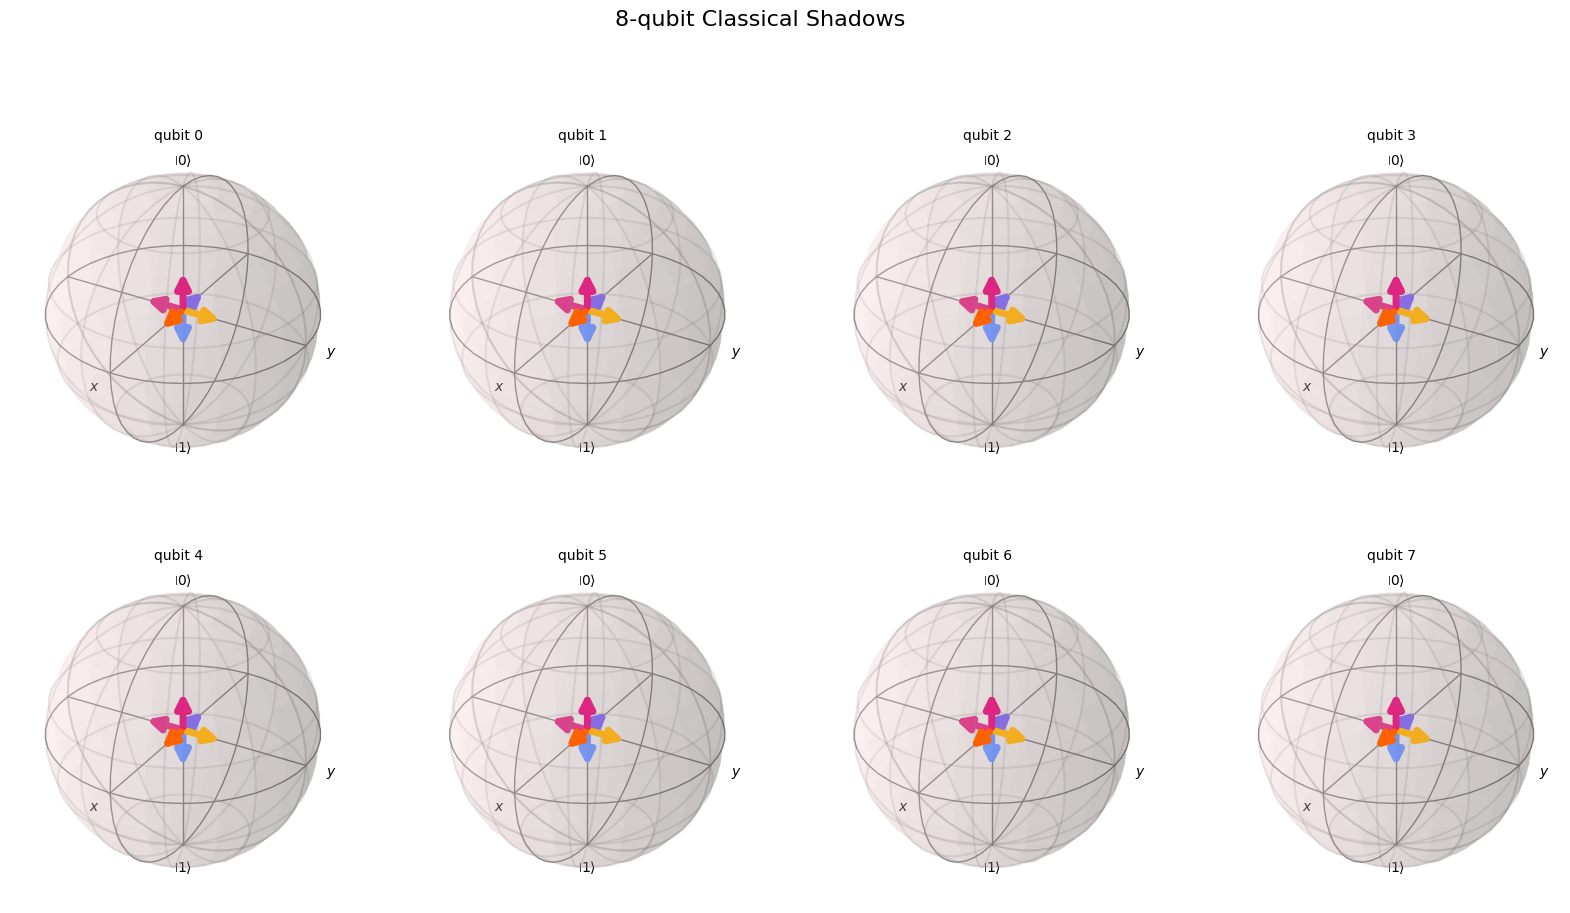

In [7]:
n = 8

cs_povm = ClassicalShadows(n).definition()
cs_povm.draw_bloch(title=f"{n}-qubit Classical Shadows")

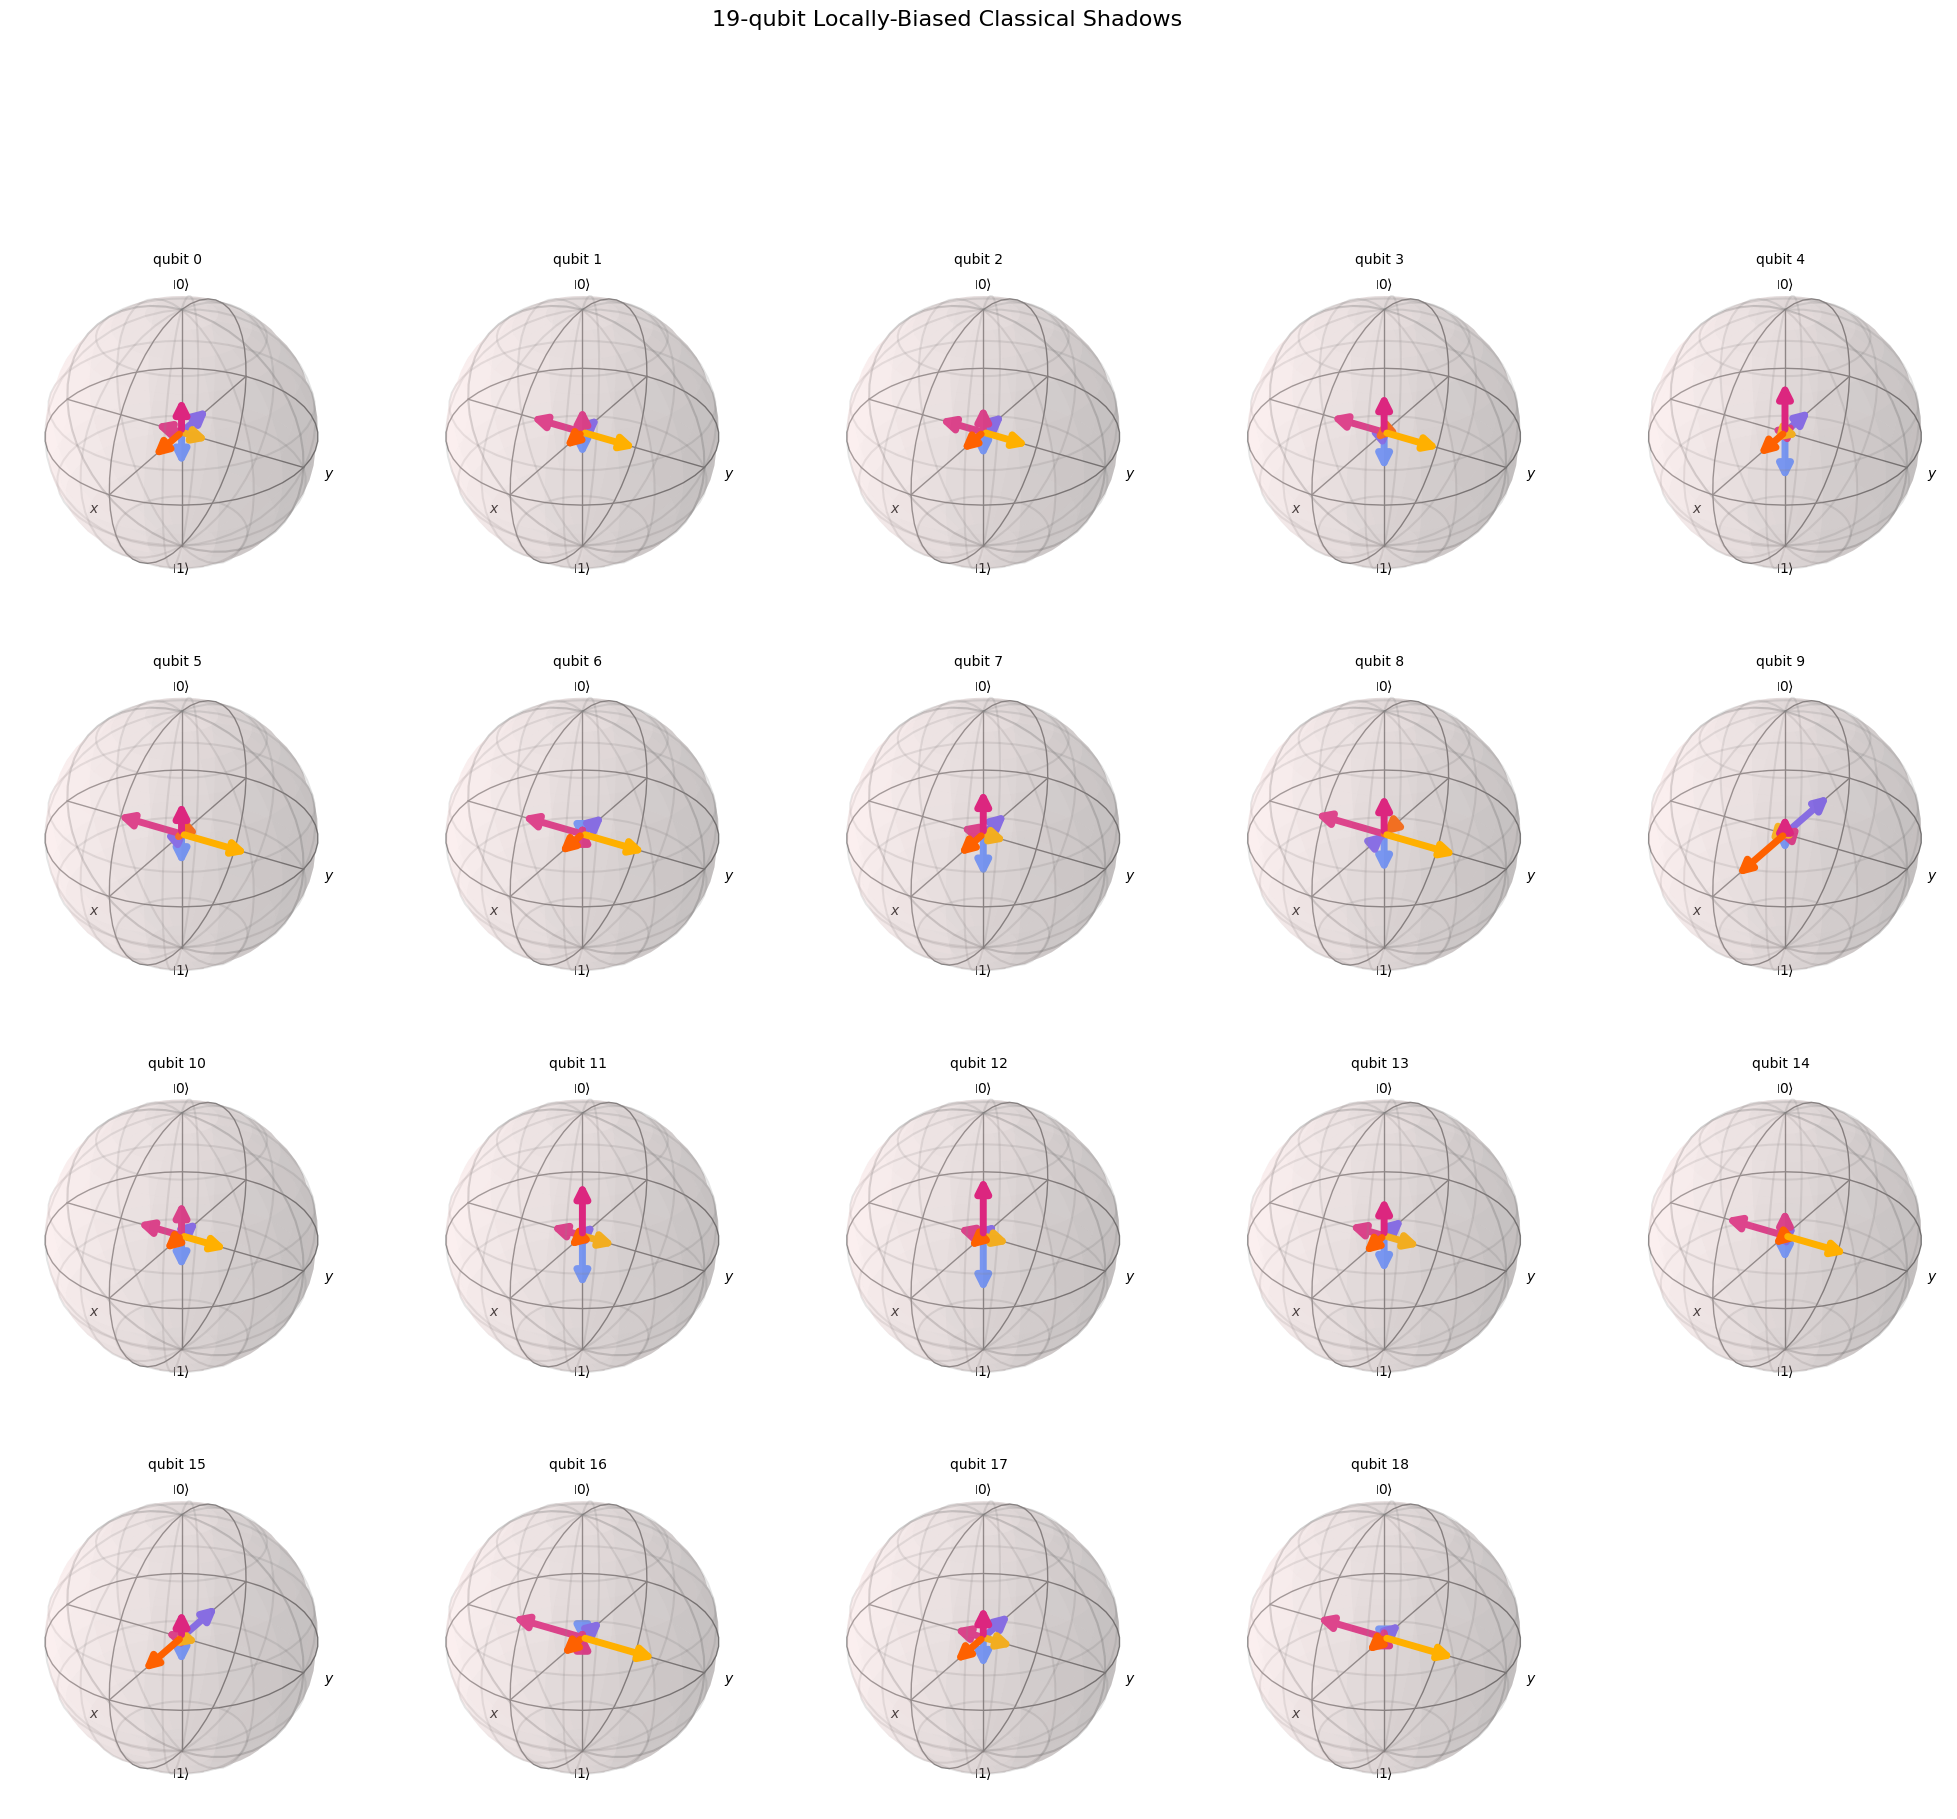

In [8]:
from povm_toolbox.library import LocallyBiasedClassicalShadows

n = 19


bias = np.random.uniform(0, 1, size=3 * n).reshape((n, 3))
bias /= bias.sum(axis=1)[:, np.newaxis]

cs_povm = LocallyBiasedClassicalShadows(n, bias=bias).definition()
cs_povm.draw_bloch(title=f"{n}-qubit Locally-Biased Classical Shadows")

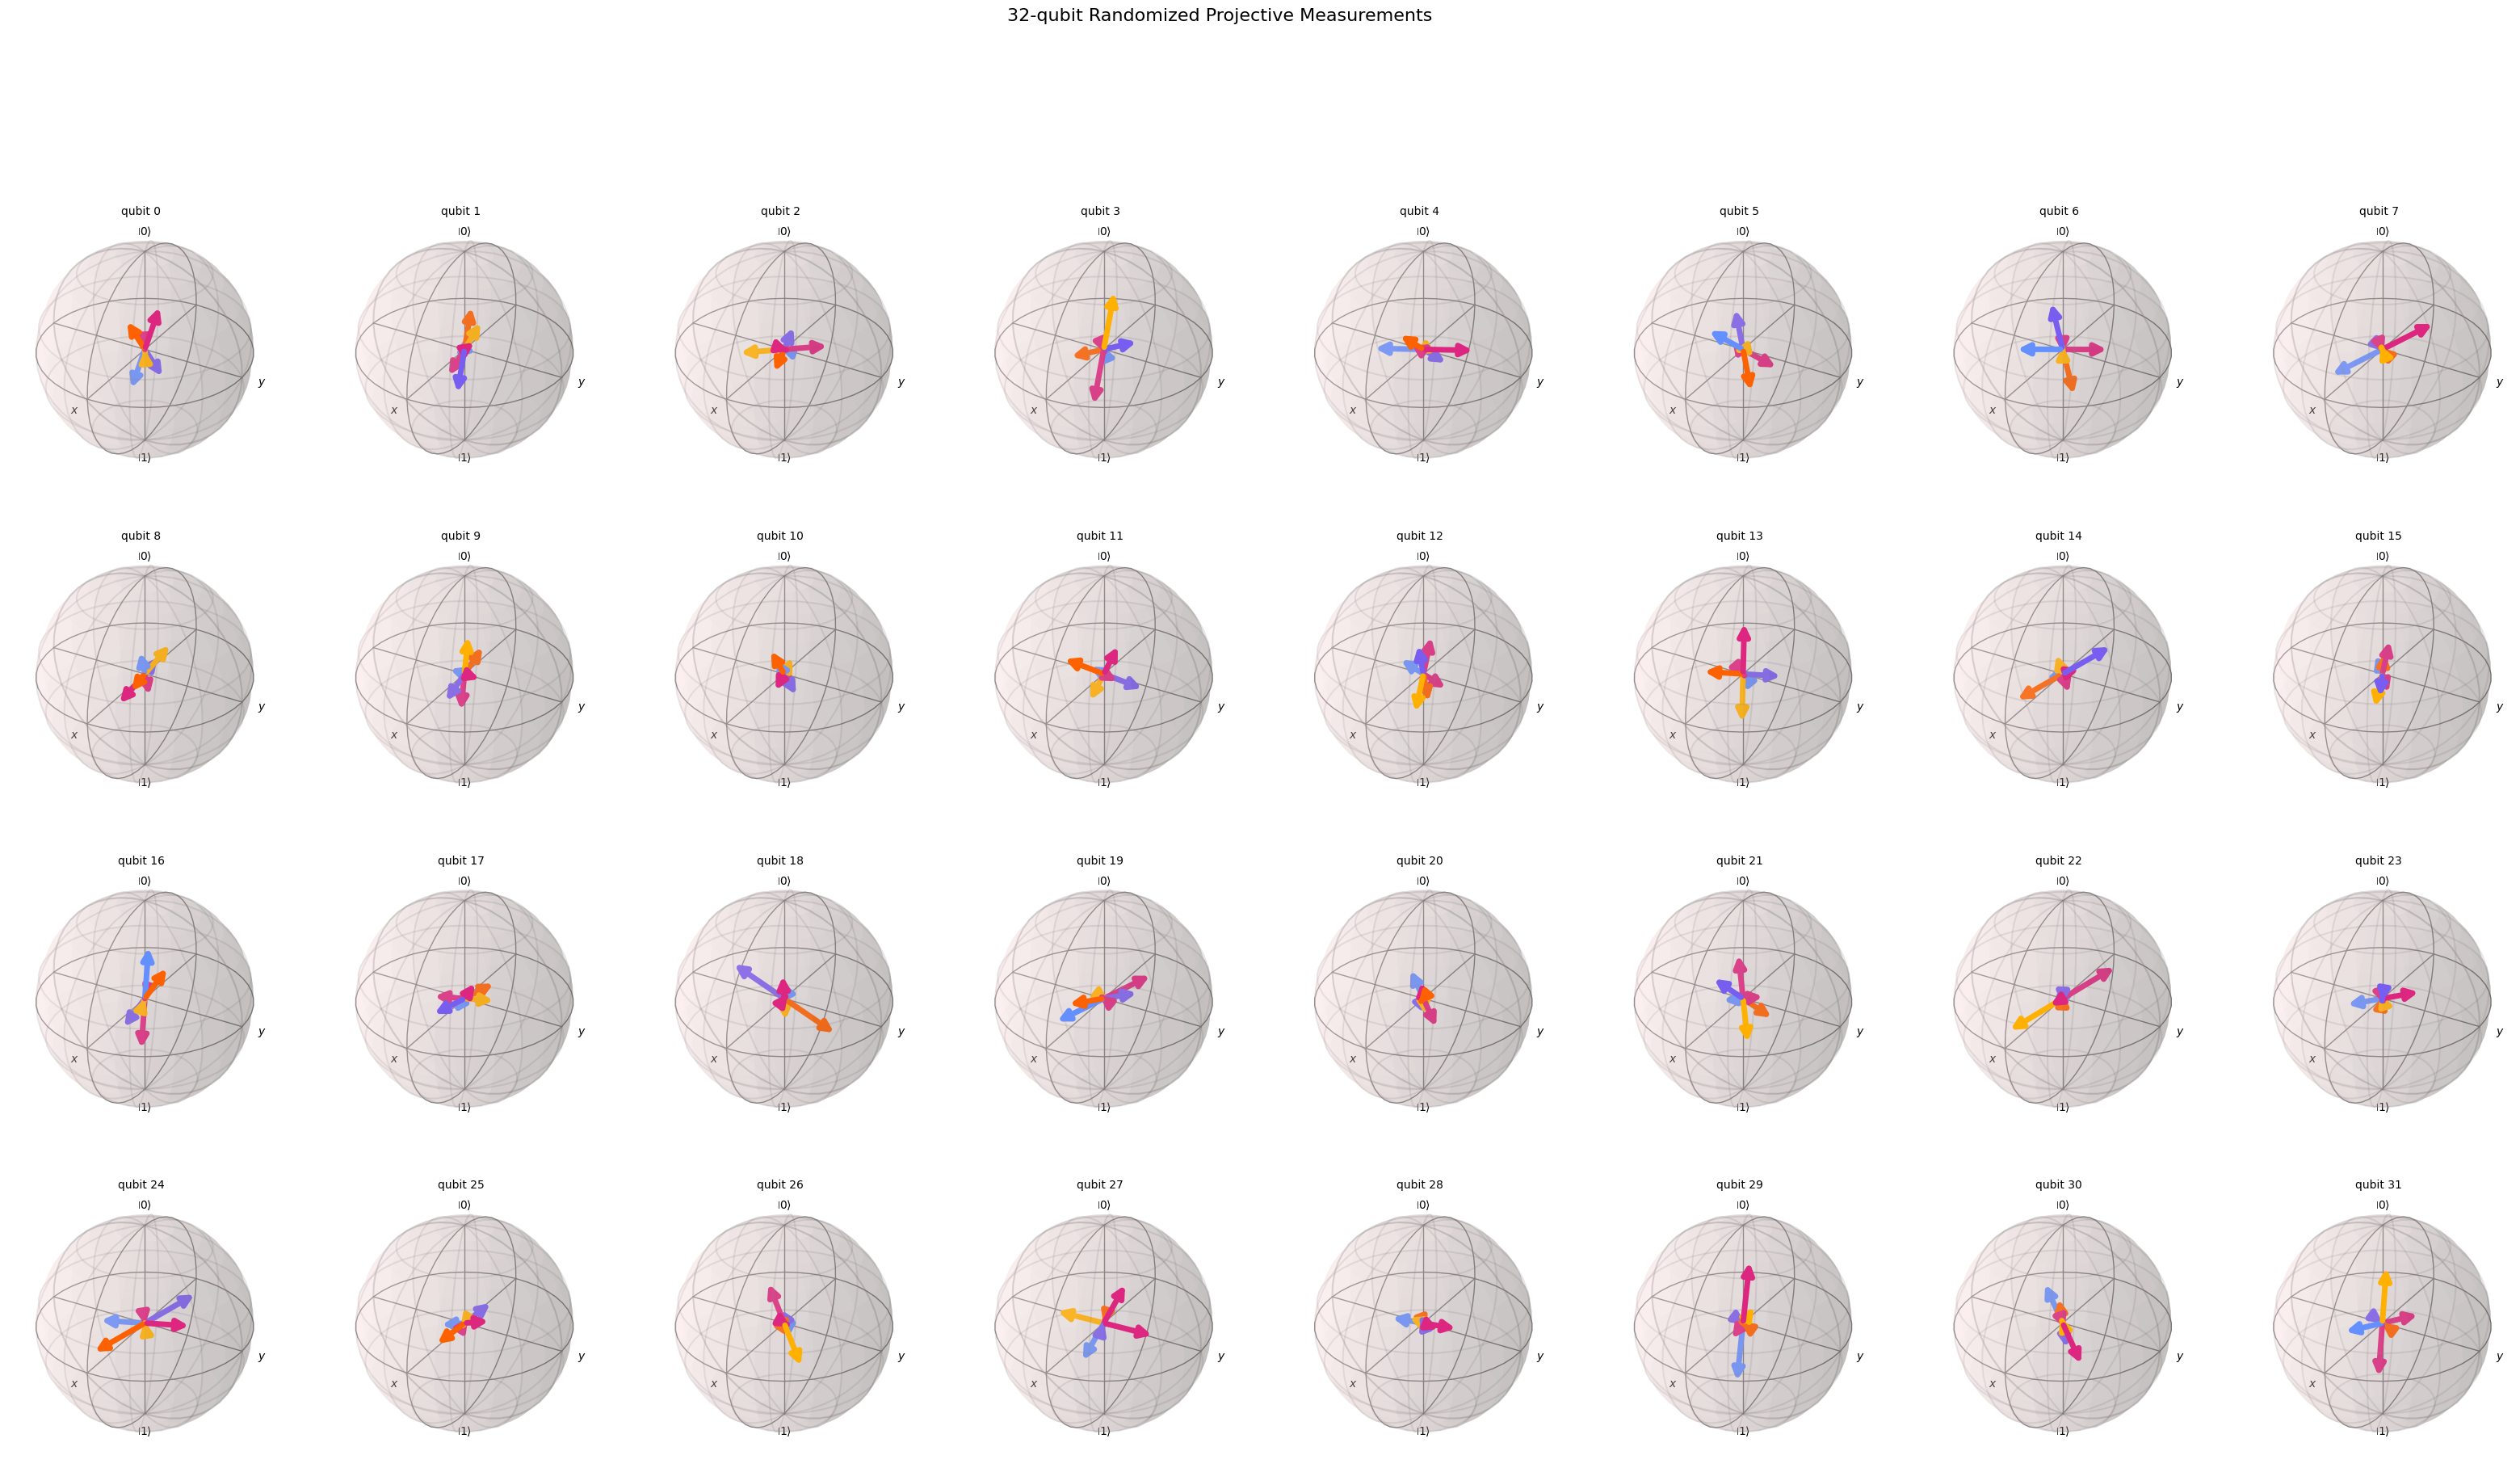

In [9]:
from povm_toolbox.library import RandomizedProjectiveMeasurements

n = 32

phi = 2 * np.pi * np.random.uniform(0, 1, size=3 * n).reshape((n, 3))
theta = np.arccos(2 * np.random.uniform(0, 1, size=3 * n).reshape((n, 3)) - 1.0)
angles = np.concatenate((theta, phi), axis=1)


bias = np.random.uniform(0, 1, size=3 * n).reshape((n, 3))
bias /= bias.sum(axis=1)[:, np.newaxis]

cs_povm = RandomizedProjectiveMeasurements(n, bias=bias, angles=angles).definition()
cs_povm.draw_bloch(title=f"{n}-qubit Randomized Projective Measurements")

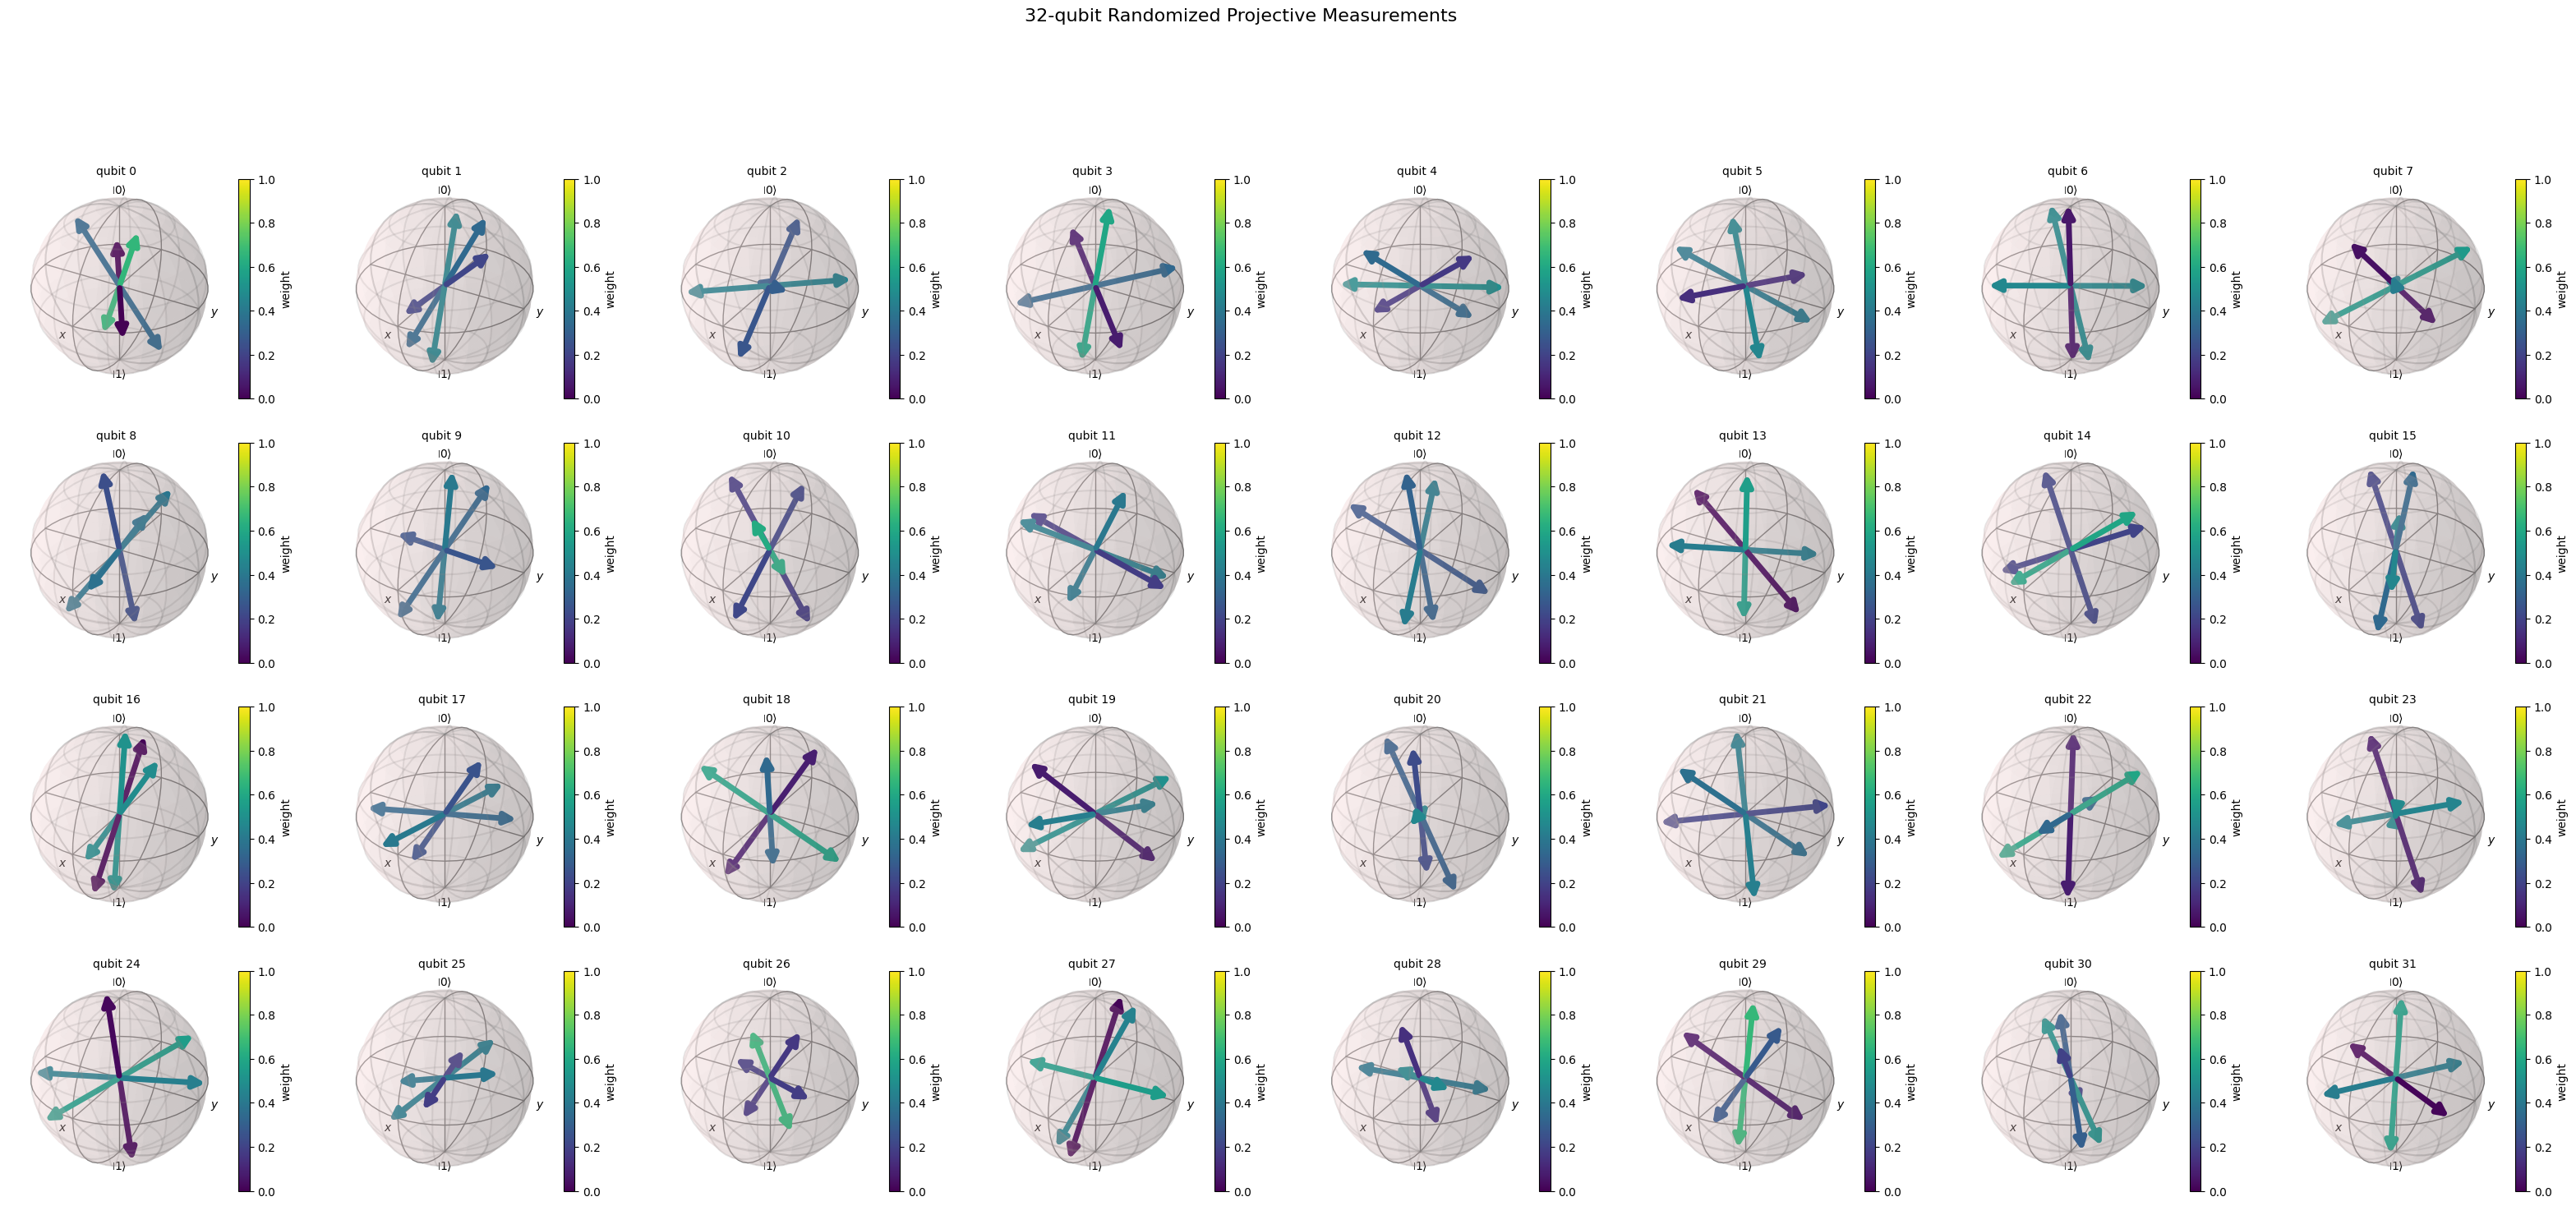

In [10]:
cs_povm.draw_bloch(colorbar=True, title=f"{n}-qubit Randomized Projective Measurements")

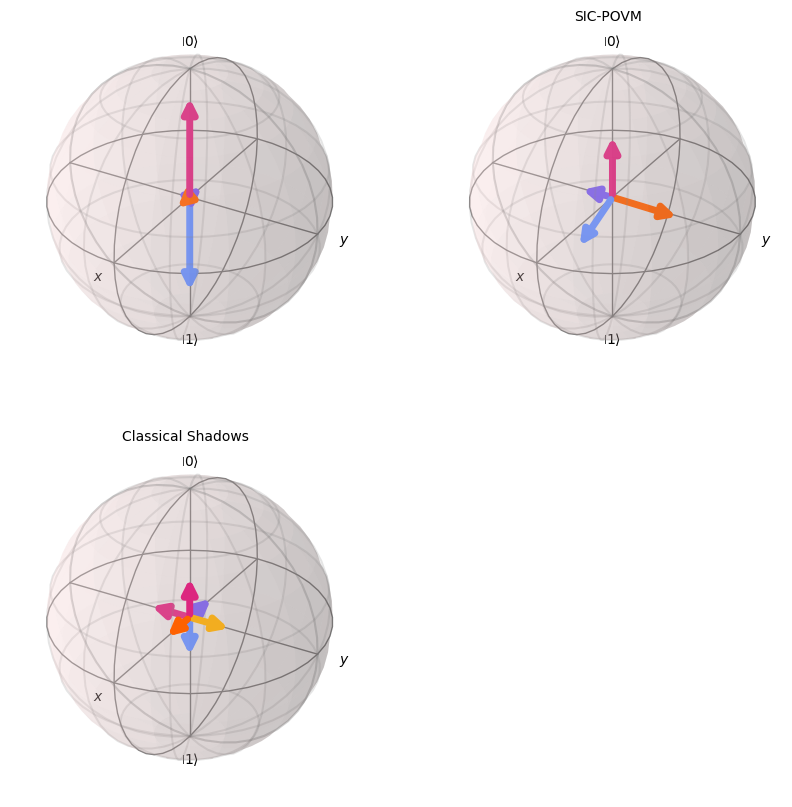

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection="3d")
sqpovm2.draw_bloch(fig=fig, ax=ax)

ax = fig.add_subplot(2, 2, 2, projection="3d")
sic_povm.draw_bloch(fig=fig, ax=ax, title="SIC-POVM")
ax = fig.add_subplot(2, 2, 3, projection="3d")
sqpovm1.draw_bloch(fig=fig, ax=ax, title="Classical Shadows")

plt.show()